In [1]:
import random
import numpy as np
import warnings

import dataset
import smooth

random.seed(0)
np.random.seed(0)
warnings.filterwarnings('ignore')

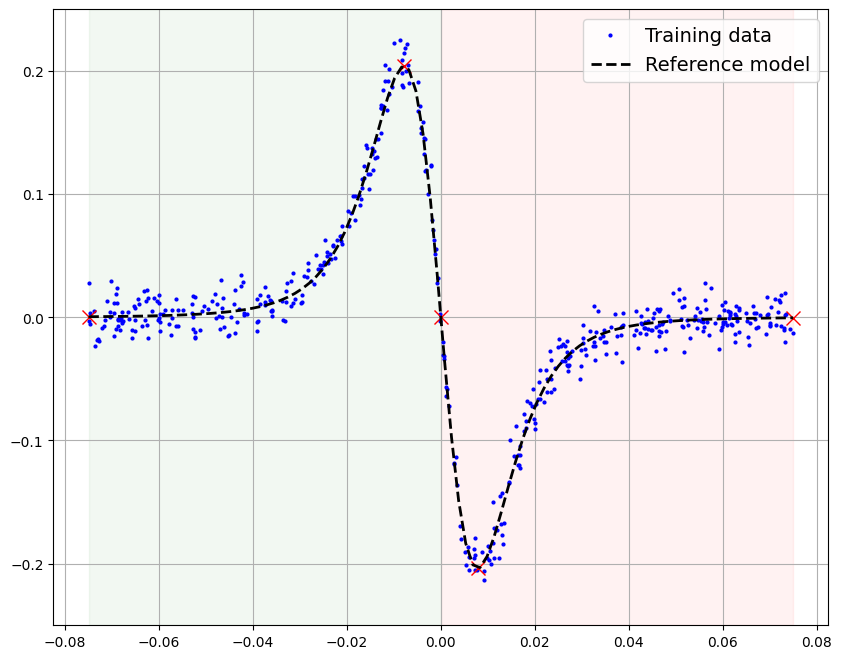

In [2]:
S = dataset.MagmanDataset()
S.sample(size=500, noise=0.05)
#S.load('data/magman.csv')
#S.erase(-0.3, 0.3)
S.plot()

In [3]:
"""import taylor_spline
tspline_est = taylor_spline.TaylorSplineEstimator()
#tspline = tspline_est.fit(S, 5, silent=True, x0=0., exp_cov=1.)

__xl = -0.3
__xu = -0.1 #S.xu
__x0 = (__xu + __xl) / 2.
tspline = tspline_est.fit_fromto(S, 2, silent=True, x0=__x0, xl=__xl, xu=__xu)

print(f"Fitness: {tspline.fitness(S)}")
S.plot()
tspline.plot()"""

'import taylor_spline\ntspline_est = taylor_spline.TaylorSplineEstimator()\n#tspline = tspline_est.fit(S, 5, silent=True, x0=0., exp_cov=1.)\n\n__xl = -0.3\n__xu = -0.1 #S.xu\n__x0 = (__xu + __xl) / 2.\ntspline = tspline_est.fit_fromto(S, 2, silent=True, x0=__x0, xl=__xl, xu=__xu)\n\nprint(f"Fitness: {tspline.fitness(S)}")\nS.plot()\ntspline.plot()'

In [4]:
"""%matplotlib widget
import ipywidgets as widgets
import taylor_spline

S.plot()
prev_drawings = []
@widgets.interact(x0=(S.xl, S.xu, 0.01), deg=(0, 10, 1), exp_cov=(0.01, 1.0, 0.01))
def update(x0=0., deg=10, exp_cov=0.3):
    global prev_drawings

    tspline_fitter = taylor_spline.TaylorSplineEstimator()
    tspline = tspline_fitter.fit(S, deg, silent=True, x0=x0, exp_cov=exp_cov)

    for d in prev_drawings: d.remove()
    prev_drawings = []
    
    print(f"Fitness: {tspline.fitness(S)}")
    prev_drawings += tspline.plot(show=False)
"""
    
"""smoother = smooth.Smoother(S, 2)
smoother.smoth()"""

'smoother = smooth.Smoother(S, 2)\nsmoother.smoth()'

In [5]:
"""import mesh
import matplotlib.pyplot as plt

def plot_mesh(X:list, Y:list):
    S.plot()
    for idx in range(len(X)):
        plt.plot(X[idx], Y[idx], 'o', markersize=8)
    plt.show()

X, Y, history = mesh.compute_mesh(S, npoints=50, niters=380, iter_callback=None)
plot_mesh(X, Y)

X_iters = [i for i in range(1, history['totiter']+1)]
#plt.plot( X_iters, history['fit'], label='fit' )
#plt.plot( X_iters, history['peak'], label='peaks' )
plt.plot( X_iters, history['peaks_fit'], label='peaks fit' )
plt.legend(loc='upper right')"""

"import mesh\nimport matplotlib.pyplot as plt\n\ndef plot_mesh(X:list, Y:list):\n    S.plot()\n    for idx in range(len(X)):\n        plt.plot(X[idx], Y[idx], 'o', markersize=8)\n    plt.show()\n\nX, Y, history = mesh.compute_mesh(S, npoints=50, niters=380, iter_callback=None)\nplot_mesh(X, Y)\n\nX_iters = [i for i in range(1, history['totiter']+1)]\n#plt.plot( X_iters, history['fit'], label='fit' )\n#plt.plot( X_iters, history['peak'], label='peaks' )\nplt.plot( X_iters, history['peaks_fit'], label='peaks fit' )\nplt.legend(loc='upper right')"

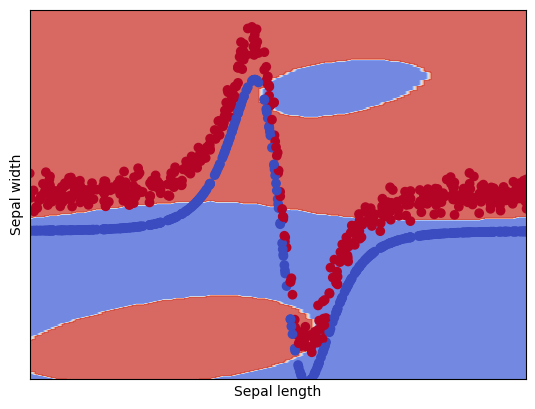

In [12]:
from sklearn import svm
import matplotlib.pyplot as plt 

X = []
y = []
for dp in S.data:
    X.append([dp.x, dp.y])
    y.append(1)

    X.append([dp.x, S.func(dp.x)-0.05])
    y.append(0)

svc = svm.SVC(kernel='rbf', gamma=20.7, C=50.)

# train the model on the data 
svc.fit(X, y) 
  
# make predictions on the data 
y_pred = svc.predict(X) 

#
# plot
#

# create a mesh to plot in
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(S.xl, S.xu, h),
                     np.arange(S.yl, S.yu, h))


Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
X = np.array(X)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("")

plt.show()

NameError: name 'curve' is not defined

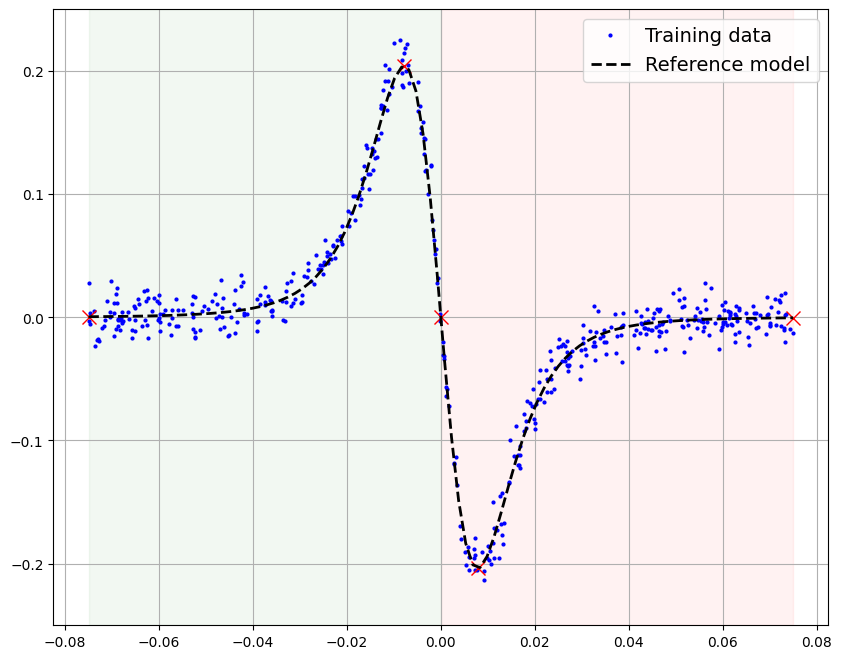

In [7]:
import mesh_bezier
import matplotlib.pyplot as plt

#def plot_mesh(X:list, Y:list):
#    S.plot()
#    for idx in range(len(X)):
#        plt.plot(X[idx], Y[idx], 'o', markersize=8)
#    plt.show()

#curve, ga_instance = mesh_bezier.compute_mesh_ga(S, nsplines=4, niters=100, iter_callback=None)
#curve, history = mesh_bezier.compute_mesh(S, nsplines=1, niters=500, iter_callback=None)
#plot_mesh(X, Y)

S.plot()
curve.plot()

'ga_instance.plot_fitness()'

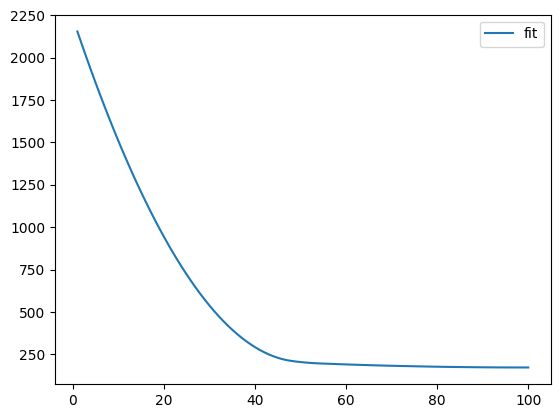

In [ ]:
X_iters = [i for i in range(1, history['totiter']+1)]
plt.plot( X_iters, history['fit'], label='fit' )
plt.legend(loc='upper right')

"""ga_instance.plot_fitness()"""

In [ ]:
"""import bezier
import matplotlib.pyplot as plt

peak_x = 0.208

X = []
Y = []

def add_point(x):
    X.append(x)
    Y.append(S.func(x))

add_point(S.xl)
#add_point(-1.5)
add_point(-peak_x)
add_point(+peak_x)
#add_point(+1.5)
add_point(S.xu)

for x in np.linspace(S.xl, S.xu, 10).tolist():
    add_point(x)

nodes = np.asfortranarray([
    X,
    Y
])
curve = bezier.Curve(nodes, degree=len(X)-1)

S.plot()
for t in np.linspace(0., 1., 100).tolist():
    XY = curve.evaluate(t)
    plt.plot(XY[0], XY[1], 'og', markersize=5)

for i in range(len(X)):
    plt.plot(X[i], Y[i], 'or', markersize=5)"""

"import bezier\nimport matplotlib.pyplot as plt\n\npeak_x = 0.208\n\nX = []\nY = []\n\ndef add_point(x):\n    X.append(x)\n    Y.append(S.func(x))\n\nadd_point(S.xl)\n#add_point(-1.5)\nadd_point(-peak_x)\nadd_point(+peak_x)\n#add_point(+1.5)\nadd_point(S.xu)\n\nfor x in np.linspace(S.xl, S.xu, 10).tolist():\n    add_point(x)\n\nnodes = np.asfortranarray([\n    X,\n    Y\n])\ncurve = bezier.Curve(nodes, degree=len(X)-1)\n\nS.plot()\nfor t in np.linspace(0., 1., 100).tolist():\n    XY = curve.evaluate(t)\n    plt.plot(XY[0], XY[1], 'og', markersize=5)\n\nfor i in range(len(X)):\n    plt.plot(X[i], Y[i], 'or', markersize=5)"